# SI 618 Project Description and Basic Manipulation

## Project Title: **Unveiling Patterns in Amazon Book Reviews: Clustering Analysis with NLP Techniques**
### Team Members (Uniquename): *ChengYu Ko (cyko)*, *Ying Wang (mmywang)*, *Junyi Deng (junyiden)*

## Overview

> The project aims to analyze Amazon book reviews to unveil patterns and insights using a combination of clustering analysis and natural language processing (NLP) techniques. By leveraging NLP preprocessing and representation methods, followed by traditional clustering algorithms, the project seeks to group similar reviews together based on their textual content. This approach enables the identification of common themes, topics, and sentiments expressed within the reviews, providing valuable insights into reader preferences and trends in the book market.

## Motivation

> The motivation behind this project lies in the abundance of textual data within Amazon book reviews and the quest to derive valuable insights from it, benefiting stakeholders across the book industry. The project is driven by three key motivations:

- **Understanding Reader Preferences:**<br>
  Amazon book reviews provide rich sources of feedback from readers regarding their likes, dislikes, and preferences for different books. Analyzing this data can help authors, publishers, and marketers gain a deeper understanding of what resonates with readers and tailor their offerings accordingly.

- **Identifying Trends and Patterns:**<br>
  By analyzing patterns and trends within Amazon book reviews, we can uncover common themes, topics, and sentiments expressed by readers. This knowledge can inform content creation strategies, guide marketing efforts, and help identify emerging trends in the book market.

- **Informing Decision-Making:**<br>
  Stakeholders in the book industry, including authors, publishers, and marketers, can use the insights generated from this analysis to make data-driven decisions. Whether it's refining book descriptions, targeting specific reader demographics, or optimizing marketing campaigns, access to actionable insights is invaluable for informed decision-making.

## Data Sources

1. **Amazon Books Reviews Dataset:**
   - Description: This dataset contains reviews of books available on Amazon, including information such as book titles, user ratings, review text, and more.
   - URL: [Amazon Books Reviews Dataset](https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews)

2. **Books Metadata Dataset:**
   - Description: This dataset provides metadata about books available on Amazon, including information such as book titles, authors, publishers, genres, and publication dates.
   - URL: [Books Metadata Dataset](https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews)

**Explanation of Complementary Datasets:**

- The Amazon Books Reviews dataset provides detailed reviews and ratings from users, offering insights into reader opinions, sentiments, and preferences for specific books. On the other hand, the Books Dataset offers comprehensive information about the books themselves, including details about authors, genres, publishers, and publication dates.

- By merging these datasets using the common identifier `Title`, we can achieve a comprehensive understanding of the Amazon book ecosystem. The reviews dataset offers insights into reader feedback and sentiments on individual books, while the Books dataset provides contextual information such as genres, authors, and publication dates. This integration allows us to correlate reader sentiments with various book attributes, including genre or author, facilitating a deeper analysis of reader preferences and market trends.
<br>
<div style='text-align:center'>
    <img src='https://i.imgur.com/9ELRD7G.jpg' alt='Relationship between Amazon Books Reviews and Books Metadata Datasets' width='800'/>
</div>


## Data Description

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the raw datasets
reviews = pd.read_csv('Books_rating.csv')
books = pd.read_csv('books_data.csv')

In [3]:
# Select the variables of interest
selected_reviews = ['Id', 'Title', 'User_id', 'profileName', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text']
selected_books = ['Title', 'description', 'authors', 'publisher', 'publishedDate', 'categories']

reviews_df = reviews[selected_reviews]
books_df = books[selected_books]

In [4]:
# Create a DataFrame for size
size_df = pd.DataFrame({
    'Dataset': ['Reviews', 'Books'],
    'Number of Rows': [reviews_df.shape[0], books_df.shape[0]],
    'Number of Columns': [reviews_df.shape[1], books_df.shape[1]]
})
size_df

,Dataset,Number of Rows,Number of Columns
0,Reviews,3000000,9
1,Books,212404,6


In [5]:
# Create DataFrames for missing values for reviews and books datasets
missing_reviews_df = pd.DataFrame({
    'Variable': reviews_df.columns.tolist(),
    'Missing Values': [reviews_df[var].isnull().sum() for var in reviews_df.columns]
})
missing_reviews_df

,Variable,Missing Values
0,Id,0
1,Title,208
2,User_id,561787
3,profileName,561905
4,review/helpfulness,0
5,review/score,0
6,review/time,0
7,review/summary,407
8,review/text,8


In [6]:
missing_books_df = pd.DataFrame({
    'Variable': books_df.columns.tolist(),
    'Missing Values': [books_df[var].isnull().sum() for var in books_df.columns]
})
missing_books_df

,Variable,Missing Values
0,Title,1
1,description,68442
2,authors,31413
3,publisher,75886
4,publishedDate,25305
5,categories,41199


> * The `reviews` dataset contains 3,000,000 rows and 9 columns, while the `books` dataset comprises 212,404 rows and 6 columns.
> * Notably, the reviews dataset has missing values in `User_id` (561,787) and `profileName` (561,905), while the books dataset exhibits missing data in `publisher` (75,886) and `description` (68,442).

> We will address these missing values through techniques such as imputation, deletion, or other preprocessing methods, depending on our analysis goals and context. Further exploration and analysis will be conducted to understand the impact of these missing values on our overall analysis.

## Data Manipulation

In [7]:
# Create copies of the DataFrame
reviews_df = reviews_df.copy()
books_df = books_df.copy()

# Drop missing values in the "Title" column
reviews_df.dropna(subset=['Title'], inplace=True)
books_df.dropna(subset=['Title'], inplace=True)

# Drop duplicates in the "Title" column
reviews_df.drop_duplicates(subset=['Title'], inplace=True)
books_df.drop_duplicates(subset=['Title'], inplace=True)

# Reset index after dropping rows
reviews_df.reset_index(drop=True, inplace=True)
books_df.reset_index(drop=True, inplace=True)

# Merge the datasets based on the "Title" column
merged_df = pd.merge(reviews_df, books_df, on='Title', how='left')

In [8]:
# Convert Unix timestamp and extract year
merged_df['review/time'] = pd.to_datetime(merged_df['review/time'], unit='s').dt.year

# Extract year from 'publishedDate' column
merged_df['publishedDate'] = merged_df['publishedDate'].str.extract(r'(\d{4})')

# Rename the columns
merged_df.rename(columns={'review/time': 'review/year', 'publishedDate': 'publishedYear'}, inplace=True)

# Convert 'review/year' and 'publishedYear' to numeric type
merged_df['review/year'] = pd.to_numeric(merged_df['review/year'], errors='coerce')
merged_df['publishedYear'] = pd.to_numeric(merged_df['publishedYear'], errors='coerce')

# Extract the values in 'authors' and 'categories'
merged_df['authors'] = merged_df['authors'].str.extract(r'\'(.*)\'')
merged_df['categories'] = merged_df['categories'].str.extract(r'\'(.*)\'')

In [9]:
# Replace 'review/year' values equal to 1969 with 1995
merged_df.loc[merged_df['review/year'] == 1969, 'review/year'] = 1995

# Replace 'publishedYear' values with 'review/year' values where publishedYear > 'review/year'
merged_df.loc[merged_df['publishedYear'] > merged_df['review/year'], 'publishedYear'] = merged_df['review/year']

# make a copy for the merged dataset
reviews_books = merged_df.copy()
reviews_books.head(2)

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/year,review/summary,review/text,description,authors,publisher,publishedYear,categories
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,1999,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,Julie Strain,NaN,1996.0,Comics & Graphic Novels
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,2004,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2004.0,Biography & Autobiography


> * In this data preprocessing, we began by creating copies of the original DataFrames to avoid unintentional modifications. Subsequently, we dropped missing values in the `Title` column and removed any duplicate entries based on this column to ensure data integrity. Following this, we merged the datasets based on the `Title` column, combining information from both the reviews and books datasets.<br>
> * Further data manipulation included converting Unix timestamps to the year format for the review data and extracting years from the `publishedDate` column in the books data. Column names were standardized for consistency across the dataset. To improve readability, we extracted values from the `authors` and `categories` columns.<br>
> * To address potential data inconsistencies, we converted the `review/year` and `publishedYear` columns to numeric types. Additionally, specific `review/year` values (e.g., 1969) were replaced with a more plausible value (1995), and `publishedYear` values were adjusted to align with the `review/year` where applicable.

> Overall, these preprocessing steps ensure that our merged dataset is ready for subsequent analysis, providing a comprehensive view of reviews and book metadata.

## Data Visualization

### 1. Is there any correlation between the length of the review text and the review score? Do longer reviews tend to receive higher or lower scores?

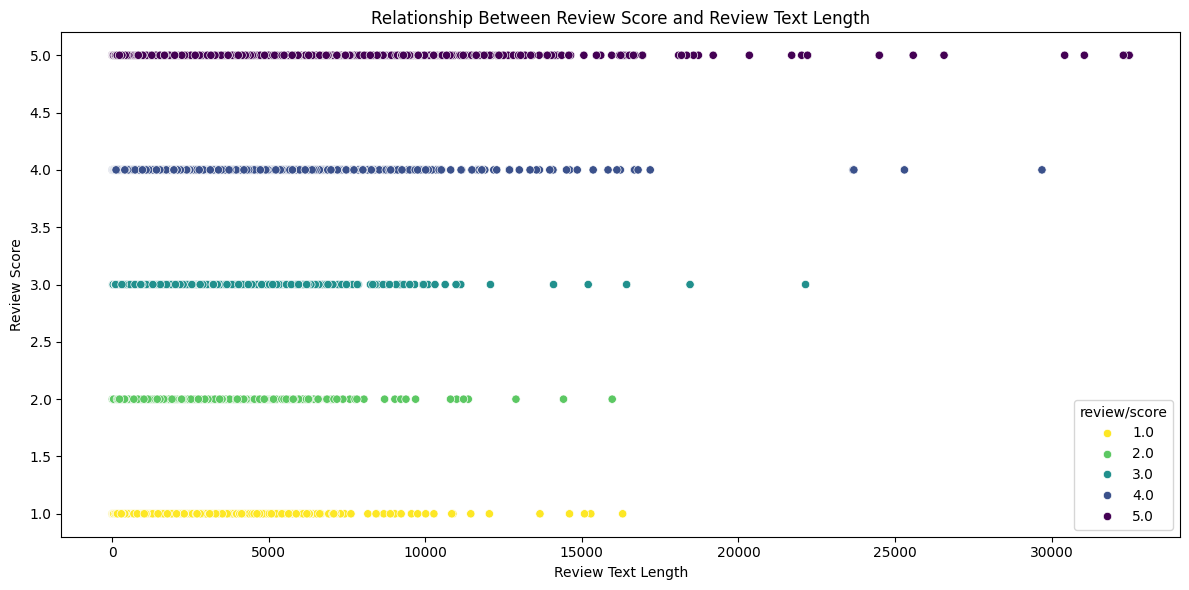

In [10]:
# Calculate the length of each review text
reviews_books['review_text_length'] = reviews_books['review/text'].str.len()

# Create a scatter plot for review score vs. review text length
plt.figure(figsize=(12, 6))
sns.scatterplot(data=reviews_books, x='review_text_length', y='review/score', hue='review/score', palette='viridis_r')
plt.title('Relationship Between Review Score and Review Text Length')
plt.xlabel('Review Text Length')
plt.ylabel('Review Score')
plt.tight_layout()
plt.show()

> Based on the scatter plot above, there appears to be a positive correlation between review score and the length of the review text. Specifically, higher review scores tend to correspond with longer review text.

### 2. Are there significant differences in the spread of review scores across different book categories? Do certain categories tend to have more variability in review scores compared to others?

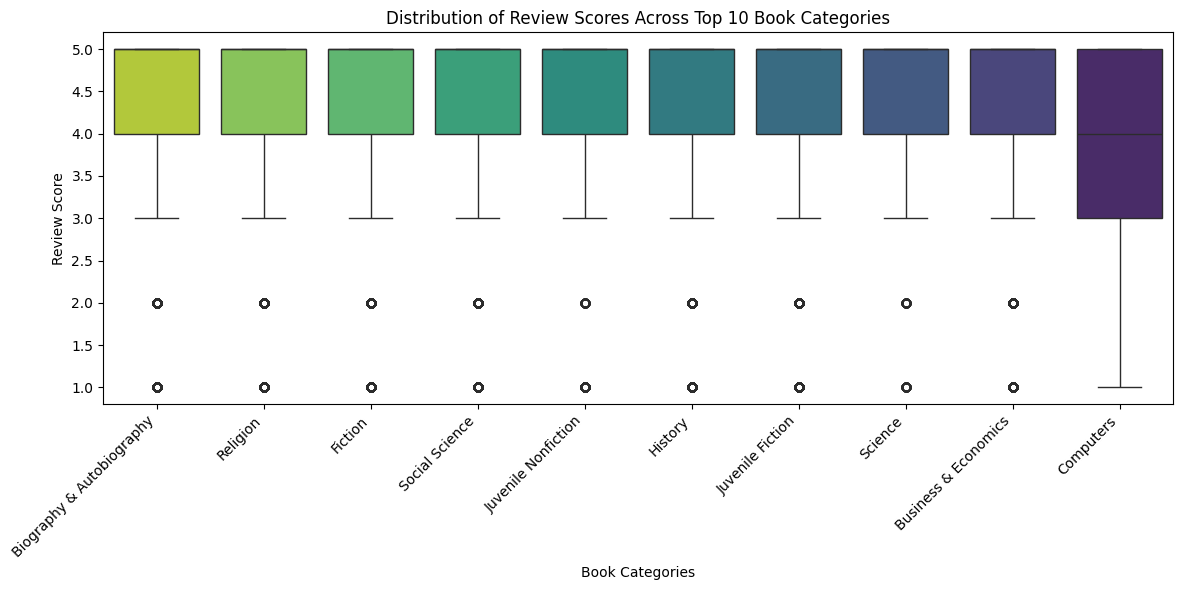

In [11]:
# Calculate the top 10 categories by review count or review score
top_categories = reviews_books['categories'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 categories
reviews_books_top_categories = reviews_books[reviews_books['categories'].isin(top_categories)]

# Create a box plot for the distribution of review scores across the top 10 book categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=reviews_books_top_categories, x='categories', y='review/score', hue='categories', palette='viridis_r', legend=False)
plt.title(f'Distribution of Review Scores Across Top 10 Book Categories')
plt.xlabel('Book Categories')
plt.ylabel('Review Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> Upon analyzing the box plot, it is evident that the majority of ratings for the top 10 book categories exhibit similar distributions. However, the `Computers` category stands out due to its wider range of review scores spanning from 1 to 5. This variance suggests that readers tend to evaluate computer books more critically and with greater variability compared to other categories.

### 3. What is the distribution of the number of reviews for the top 10 authors with the highest review counts?

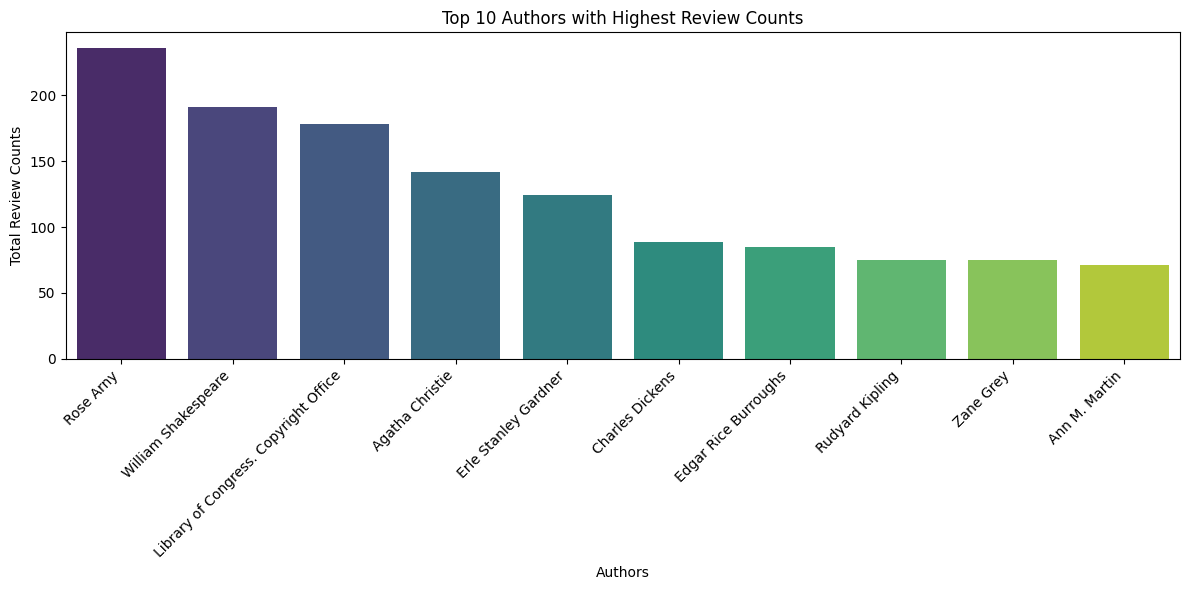

In [12]:
# Group the DataFrame by authors and count the number of reviews for each author
author_review_counts = reviews_books.groupby('authors').size().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 authors with the highest review counts
plt.figure(figsize=(12, 6))
sns.barplot(x=author_review_counts.index, y=author_review_counts.values, hue=author_review_counts.index, palette='viridis', legend=False)
plt.title('Top 10 Authors with Highest Review Counts')
plt.xlabel('Authors')
plt.ylabel('Total Review Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> The bar plot reveals that `Rose Arny`, `William Shakespeare`, and `Library of Congress` stand out with the highest review counts, ranging from 250 to 160. This indicates that these authors have garnered significant attention and feedback from readers, possibly reflecting their widespread popularity and influence within the literary community.

### 4. What are the average review scores over time for the top three authors with the highest review counts?

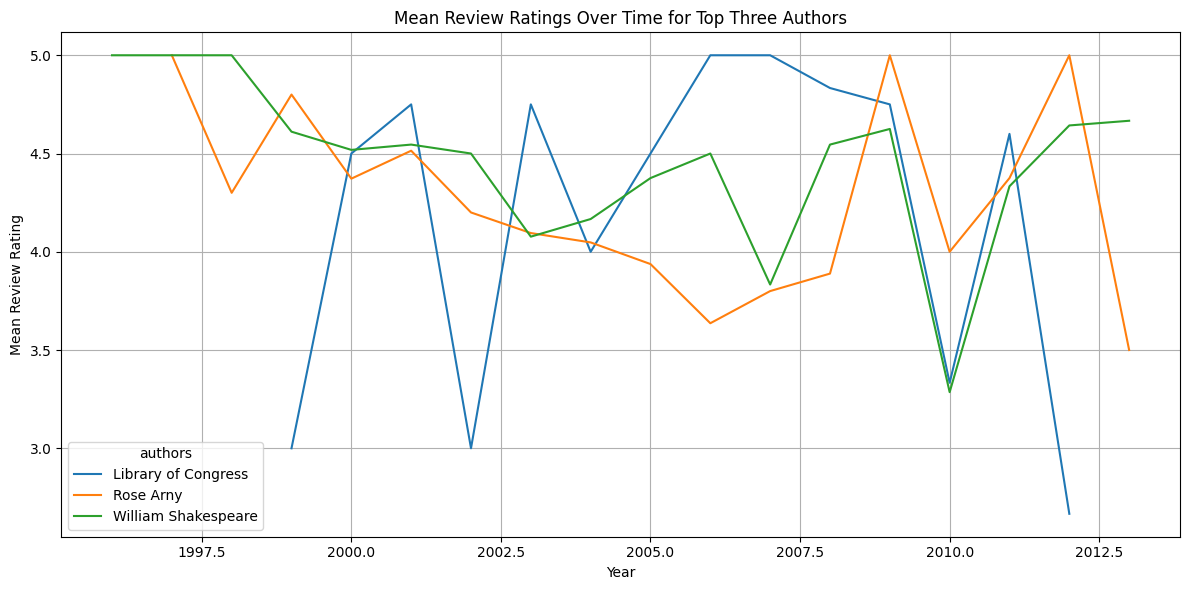

In [13]:
# Filter the dataset to include reviews for only the top three authors
top_authors = ['Rose Arny', 'William Shakespeare', 'Library of Congress']
filtered_reviews = reviews_books[reviews_books['authors'].isin(top_authors)]

# Group the filtered dataset by year and calculate the mean review score for each year
mean_review_ratings = filtered_reviews.groupby(['authors', 'review/year'])['review/score'].mean().reset_index()

# Pivot the dataframe to have authors as columns
mean_review_ratings_pivot = mean_review_ratings.pivot(index='review/year', columns='authors', values='review/score')

# Plot the mean review ratings over time for the top three authors
mean_review_ratings_pivot.plot(figsize=(12, 6))
plt.title('Mean Review Ratings Over Time for Top Three Authors')
plt.xlabel('Year')
plt.ylabel('Mean Review Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

> The line plot illustrates the average review scores over time for the top three authors with the highest review counts. Notably, the `Library of Congress` exhibits considerable fluctuations in review scores, suggesting a trend of more critical evaluation of its books. Conversely, both `Rose Arny` and `William Shakespeare` demonstrate similar patterns in review scores over time, hinting at potential similarities in the characteristics of their works. These observations provide valuable insights for subsequent clustering analysis.